In [33]:
!pip install -q gradio

In [32]:
import numpy as np
import pandas as pd
import gradio as gr
import matplotlib.pylab as plt
import PIL.Image as Image
import tensorflow as tf
import tensorflow_hub as hub

In [4]:
TF_MODEL_URL = 'https://tfhub.dev/google/on_device_vision/classifier/landmarks_classifier_asia_V1/1'
LABEL_MAP_URL = 'https://www.gstatic.com/aihub/tfhub/labelmaps/landmarks_classifier_asia_V1_label_map.csv'
IMAGE_SHAPE = (321, 321)

In [6]:
classifier = tf.keras.Sequential([hub.KerasLayer(TF_MODEL_URL,
                                                 input_shape=IMAGE_SHAPE+(3,),
                                                 output_key="predictions:logits")])

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [7]:
df = pd.read_csv(LABEL_MAP_URL)

In [9]:
label_map = dict(zip(df.id, df.name))

In [10]:
label_map

{0: 'Bagha Shahi Mosque',
 1: 'City Palace',
 2: 'The Immaculate Conception Cathedral of Cubao',
 3: 'City of David',
 4: 'Noor Mahal',
 5: 'City of David',
 6: 'Shree Muktinath Temple, Nepal',
 7: 'Shivpuri Nagarjun National Park',
 8: 'Nankin-machi',
 9: 'Khao Sok National Park',
 10: 'Mt. Goryu',
 11: 'Milk Grotto Church',
 12: 'Gili Trawangan',
 13: 'Htukkant Thein Temple',
 14: 'Yabakei Dam',
 15: 'St. Francis of Assisi Parish Church',
 16: 'Saint Hripsime Church',
 17: 'Ranipuram',
 18: "St. Joseph's Church, Beijing",
 19: 'Tower of David',
 20: 'Sandiaojiao Lighthouse',
 21: 'Ngong Ping 360',
 22: 'Chhatrapati Shivaji Terminus',
 23: 'Sea of Galilee',
 24: 'Khor Virab',
 25: 'Shanti Stupa',
 26: 'Sevanavank',
 27: 'Izmenchivoye',
 28: 'מצפה גדות',
 29: 'Autumn-Admiring Pavilion',
 30: 'Lohagad Fort',
 31: "Humble Administrator's Garden",
 32: 'Tiananmen Square',
 33: 'Sree Thanumalayan Temple',
 34: 'Menara Kuala Lumpur',
 35: 'Lok Virsa Heritage Museum',
 36: 'Batu Caves',
 37:

In [20]:
img_loc = "sripuram.webp"

In [21]:
img = Image.open(img_loc).resize(IMAGE_SHAPE)

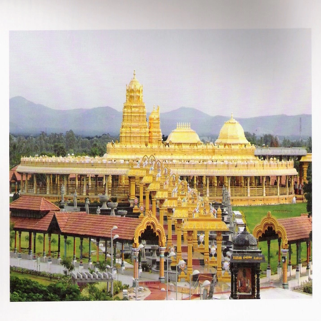

In [22]:
img

In [23]:
img = np.array(img)/255.0
img.shape

(321, 321, 3)

In [24]:
img = img[np.newaxis, ...]

In [26]:
img.shape

(1, 321, 321, 3)

In [27]:
result = classifier.predict(img)
result

array([[0.15068655, 0.34730315, 0.11743005, ..., 0.1790346 , 0.09547322,
        0.07287773]], dtype=float32)

In [28]:
result.shape

(1, 98960)

In [31]:
label_map[np.argmax(result)]


'Shri Jagannath Temple, Puri'

In [34]:
class_names=list(label_map.values())

In [35]:
def classify_image(image):
    img = np.array(image)/255.0
    img = img[np.newaxis, ...]
    prediction = classifier.predict(img)
    return label_map[np.argmax(prediction)]

In [ ]:
image = gr.inputs.Image(shape=(321, 321))
label = gr.outputs.Label(num_top_classes=1)

gr.Interface(
    classify_image, 
    image, 
    label,
    capture_session=True).launch(debug=True);

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://55173.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces
